<a href="https://colab.research.google.com/github/sabinaML/AB_test_analytics_python/blob/main/AB_%D1%82%D0%B5%D1%81%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Подгрузим пакеты 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from scipy.stats import f_oneway
import scipy.stats as stats
from scipy import stats

<div class="alert alert-info">
<b>Задание № 1 </b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)
t,p=stats.ttest_ind(A,B)
p


0.08451003973499756

In [ ]:
## p-value более 0,05 - результат статистически НЕ значим, нулевую гипотезу НЕ отклоняем - статистически значимой разницы нет

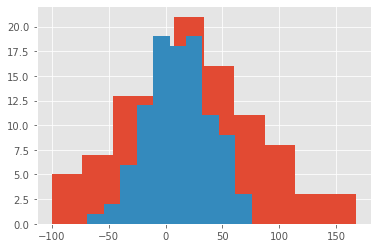

In [ ]:
plt.hist(B);
plt.hist(A);

<div class="alert alert-info">
<b>Задание № 2 </b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [ ]:
#применяем t-test для зависимых выборок
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)
t,p=stats.ttest_rel(A,B)
p
# p-value менее 0,05 - результат статистически значим

0.03238579156467659

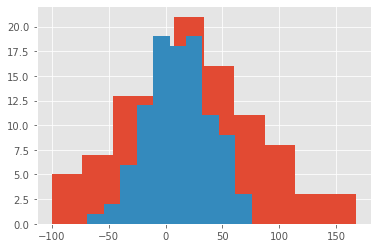

In [ ]:
plt.hist(B);
plt.hist(A);

<div class="alert alert-info">
<b>Задание № 3 </b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
</div>

In [ ]:
water = [1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1]
nutri = [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3, 5]
mineral = [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1, 4]

t,p=stats.f_oneway(water, nutri, mineral )
p

2.9240047906326866e-05

In [ ]:
#p-value менее 0,05 - результат статистически значим, отклоняем нулевую гипотезу, эффект от удобрений статистически значим

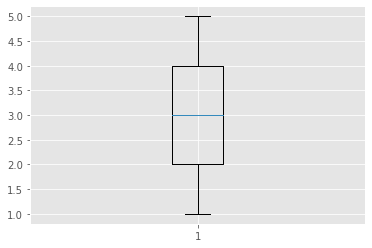

In [ ]:
plt.boxplot(water);

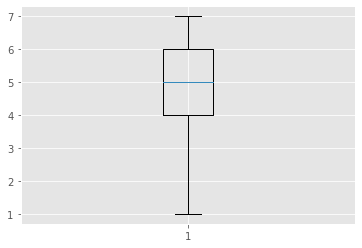

In [ ]:
plt.boxplot(nutri);

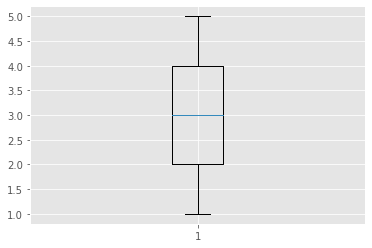

In [ ]:
plt.boxplot(mineral);

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. 
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

In [ ]:
data = pd.read_csv('cookie_cats.csv', error_bad_lines=False)  # Откроем датасет
data.head()

C:\Users\Администратор\AppData\Local\Temp\ipykernel_19544\3106034194.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('cookie_cats.csv', error_bad_lines=False)  # Откроем датасет


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом.
</div>

In [ ]:
# Посмотрим на количество участников теста.
data.groupby('version').version.count()

version
gate_30    44700
gate_40    45489
Name: version, dtype: int64

In [ ]:
data.groupby('version').sum()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,222944098441,2344795,20034,8502
gate_40,227857702576,2333530,20119,8279


In [ ]:
data.groupby('version').mean()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,4.987564e+06,52.456264,0.448188,0.190201
gate_40,5.009073e+06,51.298776,0.442283,0.182000


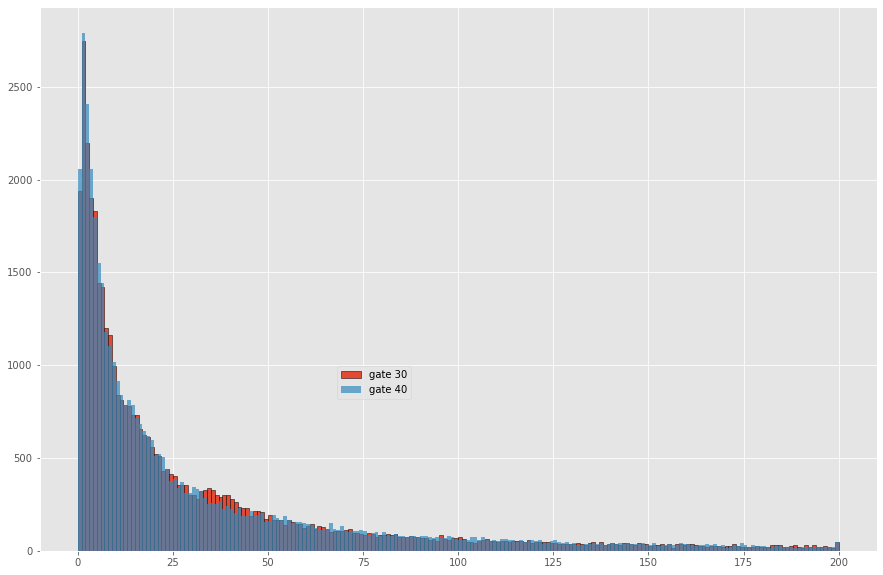

In [ ]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1,
         edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

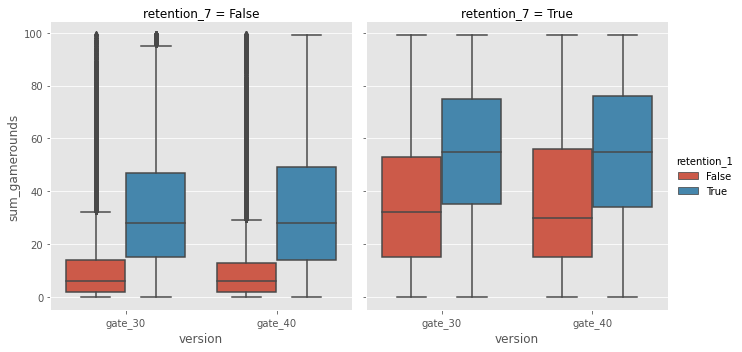

In [ ]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


In [ ]:
from scipy.stats import f_oneway
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

# Тк распределение Ненормальное - применить Т-Тест Не можем. Применим метод Манна_Уитни

stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], 
                       data[data['version'] == 'gate_40']['sum_gamerounds'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1024331250.500, p=0.050


In [ ]:
# p-value=0,05, 


# Bootstrap

In [ ]:
 # Применяем Bootstrap для того, чтобы более наглядно убедиться в наличии различий

In [ ]:
 boot_1d = []

In [ ]:
boot_mean = data.sample(frac=1, replace=True).groupby(
        'version')['retention_7'].mean() 

In [ ]:
boot_1d.append(boot_mean)

In [ ]:
boot_1d

[version
 gate_30    0.187578
 gate_40    0.178627
 Name: retention_7, dtype: float64,
 version
 gate_30    0.193094
 gate_40    0.184079
 Name: retention_7, dtype: float64]

<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

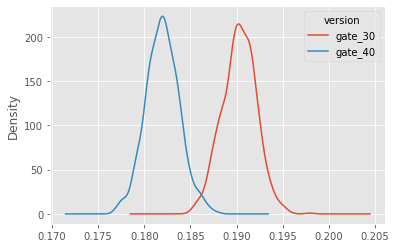

In [ ]:
# Применяем Bootstrap для того, чтобы более наглядно убедиться в наличии различий

# Creating an list with bootstrapped means for each AB-group
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby(
        'version')['retention_7'].mean()  # retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

In [ ]:
# разница статистически значима

# Покемоны и AB-тестирование 


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [ ]:
pokemon = pd.read_csv('pokemon.csv', error_bad_lines=False)  # Откроем датасет
pokemon.head()


# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

C:\Users\Администратор\AppData\Local\Temp\ipykernel_19544\354238790.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pokemon = pd.read_csv('pokemon.csv', error_bad_lines=False)  # Откроем датасет


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
pokemon['Class 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [ ]:
pokemon['Class 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [ ]:
#оставляем только тех покемонов, которые соответствуют условию и записываем в pokemon1

pokemon1=pokemon[(pokemon['Class 1'].isin(['Grass']) & (~pokemon['Class 2'].isin(['Rock']))) | 
        (pokemon['Class 1'].isin(['Rock']) & (~pokemon['Class 2'].isin(['Grass'])))
               |(pokemon['Class 2'].isin(['Grass']) & (~pokemon['Class 1'].isin(['Rock']))) |
                (pokemon['Class 2'].isin(['Rock']) & (~pokemon['Class 1'].isin(['Grass']))) 
               ]
pokemon1.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
48,49,Oddish,Grass,Poison,45,50,55,75,65,30,False


In [ ]:
#выборка параметра Attack для класса 'Grass'
A = pokemon1[pokemon1['Class 1'].isin(['Grass'])|pokemon1['Class 2'].isin(['Grass'])]['Attack']

In [ ]:
#выборка параметра Attack для класса 'Rock'
B = pokemon1[pokemon1['Class 1'].isin(['Rock'])|pokemon1['Class 2'].isin(['Rock'])]['Attack']

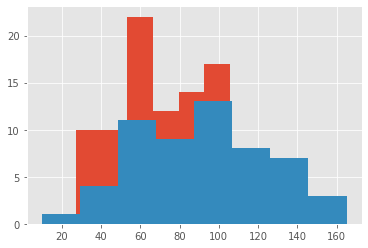

In [ ]:
Распределение близко к нормальному, значит можем применить критерий Стьюдента
plt.hist(A, bins=8);
plt.hist(B, bins=8);

In [ ]:
t, p_value = stats.ttest_ind(A, B) #Критерий Стьюдента (t-test)
t, p_value

(-3.729457582692065, 0.00027333381459902653)

Мы получаем хорошее значение p-value, равное 0,0002, и, таким образом, мы отклоняем нулевую гипотезу, то есть - средние значения двух распределений различны и это различие статистически значимо

In [ ]:

# также можем применить дисперсионный анализ для двух групп
f, p = f_oneway(A, B)
f, p
#  результат аналогичен

(13.908853861099336, 0.00027333381459902556)

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда,  что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
#оставляем только тех покемонов, которые соответствуют условию и записываем в pokemon1

pokemon1=pokemon[(pokemon['Class 1'].isin(['Water']) & (~pokemon['Class 2'].isin(['Normal']))) | 
        (pokemon['Class 1'].isin(['Normal']) & (~pokemon['Class 2'].isin(['Water'])))
               |(pokemon['Class 2'].isin(['Normal']) & (~pokemon['Class 1'].isin(['Water']))) |
                (pokemon['Class 2'].isin(['Water']) & (~pokemon['Class 1'].isin(['Normal']))) 
               ]
pokemon1.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,False
12,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,False
20,21,Pidgey,Normal,Flying,40,45,40,35,35,56,False


In [ ]:
#выборка параметра Attack для класса 'Grass'
A = pokemon1[pokemon1['Class 1'].isin(['Grass'])|pokemon1['Class 2'].isin(['Grass'])]['Speed']
A

293    30
294    50
295    70
646    75
647    95
Name: Speed, dtype: int64

In [ ]:
#выборка параметра Attack для класса 'Rock'
B = pokemon1[pokemon1['Class 1'].isin(['Rock'])|pokemon1['Class 2'].isin(['Rock'])]['Speed']
B

149    35
150    55
151    55
152    80
240    35
404    55
625    22
626    32
758    50
759    68
Name: Speed, dtype: int64

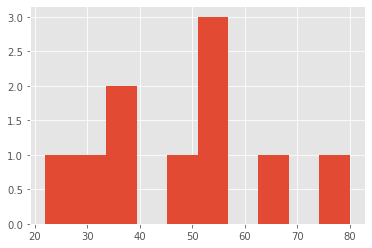

In [ ]:
#В соответствии с условием, Распределение принимаем нормальным, значит можем применить критерий Стьюдента
plt.hist(B,  bins=10);

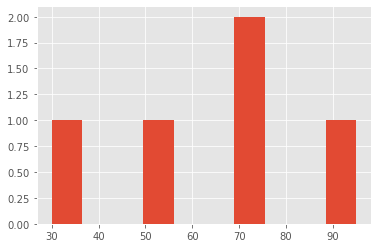

In [ ]:
plt.hist(A, bins=10);

In [ ]:
t, p_value = stats.ttest_ind(A, B) #Критерий Стьюдента (t-test)
t, p_value

(1.382137116018638, 0.19021710608407882)

Мы получаем значение p-value, равное 0,19, что больше уровня значимости 0,05.  Таким образом, мы НЕ отклоняем нулевую гипотезу, то есть - разница средних значений двух распределений статистически не значима

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

In [ ]:
# A - привитые покемоны
# B - непривитые покемоны
A=pokemon[pokemon['Name'].isin(treathed_pokemon)]['Speed']
B=pokemon[~pokemon['Name'].isin(treathed_pokemon)]['Speed']

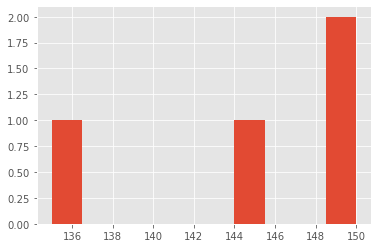

In [ ]:
plt.hist(A);

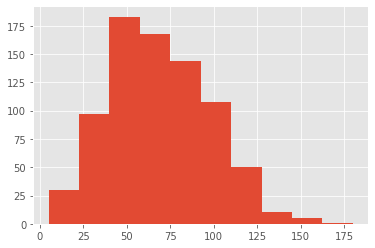

In [ ]:
plt.hist(B);

In [ ]:
# t-test  для нормального распределения (по условию задачи)
t,p=stats.ttest_ind(A,B)
p

9.51510117630786e-08

In [ ]:
#перепроверка методом Манн-Уитни
stats,p=stats.mannwhitneyu(A,B)
p

0.0006453636780809272

In [ ]:
A.mean() # среднее значение скорости для группы привитых

145.0

In [ ]:
B.mean() # среднее значение скорости для группы непривитых

67.89195979899498

In [ ]:
# p-value менее 0,05, что значит что мы отклоняем нулевую гипотезу и подтверждаем, 
# что разница между привитой и непривитой группой является статистически значимой

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
A = pokemon[pokemon['Legendary']==1]['HP_Attack_defense'] #легендарные
B = pokemon[pokemon['Legendary']==0]['HP_Attack_defense'] #простые

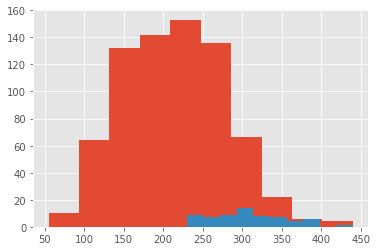

In [ ]:
plt.hist(B);
plt.hist(A);

In [ ]:
from scipy import stats
# t-test  для нормального распределения 
t, p=stats.ttest_ind(A, B)
p

7.970942205722087e-29

In [ ]:
#перепроверка методом Манн-Уитни
stats,p=stats.mannwhitneyu(A,B)
p

1.1270443168585851e-24

In [ ]:
#перепроверка методом дисперсионного анализа для двух групп
from scipy.stats import f_oneway
import scipy.stats as stats
stats, p=stats.f_oneway(A,B)
p

7.970942205720804e-29

In [ ]:
A.mean() # среднее значение скорости для группы легендарных

309.0769230769231

In [ ]:
B.mean() # среднее значение скорости для группы простых

214.4108843537415

In [ ]:
# p-value менее 0,05 во всех случаях, что значит что мы отклоняем нулевую гипотезу и подтверждаем, 
# что разница между легендырными и простыми покемонами является статистически значимой

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [ ]:
pokemon1= pokemon[(pokemon['Class 1'].isin(['Rock']) & (~pokemon['Class 2'].isin(['Ground', 'Steel', 'Ice']))) | 
        (pokemon['Class 2'].isin(['Rock']) & (~pokemon['Class 1'].isin(['Ground', 'Steel', 'Ice'])))|
 (pokemon['Class 1'].isin(['Ground']) & (~pokemon['Class 2'].isin(['Rock',  'Steel', 'Ice']))) | 
        (pokemon['Class 2'].isin(['Ground']) & (~pokemon['Class 1'].isin(['Rock',  'Steel', 'Ice'])))|
         (pokemon['Class 1'].isin(['Steel']) & (~pokemon['Class 2'].isin(['Rock', 'Ground',  'Ice']))) | 
        (pokemon['Class 2'].isin(['Steel']) & (~pokemon['Class 1'].isin(['Rock', 'Ground',  'Ice'])))|
                 (pokemon['Class 1'].isin([ 'Ice']) & (~pokemon['Class 2'].isin(['Rock', 'Ground', 'Steel']))) | 
        (pokemon['Class 2'].isin([ 'Ice']) & (~pokemon['Class 1'].isin(['Rock', 'Ground', 'Steel'])))]
               
pokemon1.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,HP_Attack_defense
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,False,210
33,34,Sandslash,Ground,NaN,75,100,110,45,55,65,False,285
36,37,Nidoqueen,Poison,Ground,90,92,87,75,85,76,False,269
39,40,Nidoking,Poison,Ground,81,102,77,85,75,85,False,260
55,56,Diglett,Ground,NaN,10,55,25,35,45,95,False,90


In [ ]:
A=pokemon1[pokemon1['Class 1'].isin(['Rock'])|pokemon1['Class 2'].isin(['Rock'])]['Defense']
B=pokemon1[pokemon1['Class 1'].isin(['Ground'])|pokemon1['Class 2'].isin(['Ground'])]['Defense']
C=pokemon1[pokemon1['Class 1'].isin(['Steel'])|pokemon1['Class 2'].isin(['Steel'])]['Defense']
D=pokemon1[pokemon1['Class 1'].isin(['Ice'])|pokemon1['Class 2'].isin(['Ice'])]['Defense']


In [ ]:
# тк у нас 4 разные группы - применяем дисперсионный анализ
from scipy.stats import f_oneway
import scipy.stats as stats
stat, p= stats.f_oneway(A,B,C,D)
p

1.885892116821956e-05

In [ ]:
A.mean()

104.09756097560975

In [ ]:
B.mean()

81.07692307692308

In [ ]:
C.mean()

109.325

In [ ]:
D.mean()

78.51515151515152

In [ ]:
 # p-value менее 0.05 - что означает, что нулевая гипотеза отклоняется - 
    #значит различия между группами являются статистически значимыми 